In [332]:
#importando as bibliotecas
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [129]:
# Usando apy do Investpy
# https://br.investing.com/currencies/usd-brl
# https://pypi.org/project/investpy/
# https://investpy.readthedocs.io/index.html
#!pip install -q investpy

In [411]:
import investpy

In [412]:
datatual = datetime.today().strftime('%d/%m/%Y')


In [511]:
data = investpy.get_currency_cross_historical_data(currency_cross='USD/BRL', from_date='01/01/2017', to_date=datatual)
data

,Open,High,Low,Close,Currency
Date,,,,,
2017-01-02,3.2538,3.2887,3.2516,3.2857,BRL
2017-01-03,3.2824,3.2929,3.2466,3.2652,BRL
2017-01-04,3.2517,3.2517,3.2100,3.2163,BRL
2017-01-05,3.2163,3.2294,3.1928,3.1991,BRL
2017-01-06,3.1972,3.2241,3.1871,3.2241,BRL
...,...,...,...,...,...
2021-09-22,5.2706,5.3191,5.2495,5.2888,BRL
2021-09-23,5.2618,5.3124,5.2561,5.3030,BRL
2021-09-24,5.3039,5.3549,5.3023,5.3344,BRL


In [512]:
data.dtypes

Open        float64
High        float64
Low         float64
Close       float64
Currency     object
dtype: object

In [513]:
data.reset_index(level=0, inplace=True)
data

,Date,Open,High,Low,Close,Currency
0,2017-01-02,3.2538,3.2887,3.2516,3.2857,BRL
1,2017-01-03,3.2824,3.2929,3.2466,3.2652,BRL
2,2017-01-04,3.2517,3.2517,3.2100,3.2163,BRL
3,2017-01-05,3.2163,3.2294,3.1928,3.1991,BRL
4,2017-01-06,3.1972,3.2241,3.1871,3.2241,BRL
...,...,...,...,...,...,...
1227,2021-09-22,5.2706,5.3191,5.2495,5.2888,BRL
1228,2021-09-23,5.2618,5.3124,5.2561,5.3030,BRL
1229,2021-09-24,5.3039,5.3549,5.3023,5.3344,BRL
1230,2021-09-26,5.3384,5.3384,5.3384,5.3384,BRL


In [514]:
data.dtypes

Date        datetime64[ns]
Open               float64
High               float64
Low                float64
Close              float64
Currency            object
dtype: object

In [515]:
data = data.sort_values("Date")

In [516]:
data.tail()

,Date,Open,High,Low,Close,Currency
1227,2021-09-22,5.2706,5.3191,5.2495,5.2888,BRL
1228,2021-09-23,5.2618,5.3124,5.2561,5.3030,BRL
1229,2021-09-24,5.3039,5.3549,5.3023,5.3344,BRL
1230,2021-09-26,5.3384,5.3384,5.3384,5.3384,BRL
1231,2021-09-27,5.3384,5.3879,5.3080,5.3812,BRL


In [517]:
df = data.drop(columns=['Currency', 'Date'])

In [518]:
df.head()

,Open,High,Low,Close
0,3.2538,3.2887,3.2516,3.2857
1,3.2824,3.2929,3.2466,3.2652
2,3.2517,3.2517,3.2100,3.2163
3,3.2163,3.2294,3.1928,3.1991
4,3.1972,3.2241,3.1871,3.2241


In [519]:
df.describe()

,Open,High,Low,Close
count,1232.000000,1232.000000,1232.000000,1232.000000
mean,4.192072,4.223624,4.162790,4.193716
std,0.870875,0.883386,0.858052,0.871024
min,3.056800,3.079600,3.038700,3.057500
25%,3.313525,3.333075,3.296000,3.312950
50%,3.927400,3.966250,3.912450,3.930750
75%,5.186825,5.228975,5.148450,5.192600
max,5.924800,5.971800,5.817600,5.885600


In [520]:
df

,Open,High,Low,Close
0,3.2538,3.2887,3.2516,3.2857
1,3.2824,3.2929,3.2466,3.2652
2,3.2517,3.2517,3.2100,3.2163
3,3.2163,3.2294,3.1928,3.1991
4,3.1972,3.2241,3.1871,3.2241
...,...,...,...,...
1227,5.2706,5.3191,5.2495,5.2888
1228,5.2618,5.3124,5.2561,5.3030
1229,5.3039,5.3549,5.3023,5.3344
1230,5.3384,5.3384,5.3384,5.3384


<Figure size 3600x1440 with 0 Axes>

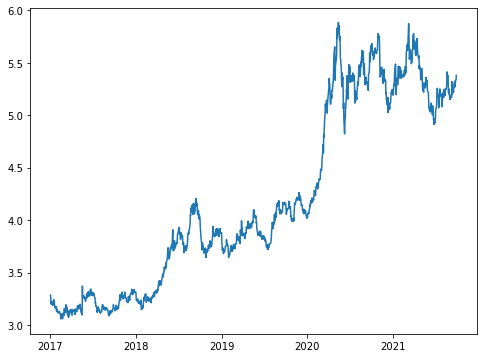

In [521]:
x1 = data.Date
y1=data.Close
plt.figure(figsize=(50,20))
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x1, y1)



In [522]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1232 entries, 0 to 1231
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1232 non-null   float64
 1   High    1232 non-null   float64
 2   Low     1232 non-null   float64
 3   Close   1232 non-null   float64
dtypes: float64(4)
memory usage: 48.1 KB


In [523]:
df['Close'] = df['Close'].shift(-1)

In [524]:
df.isna().sum()


Open     0
High     0
Low      0
Close    1
dtype: int64

In [525]:
#Criando média móvel de 5 dias de 20 dias
df['mm3d'] = df['Close'].rolling(3).mean()
df['mm5d'] = df['Close'].rolling(5).mean()
df['mm20d'] = df['Close'].rolling(20).mean()
df['mm50d'] = df['Close'].rolling(50).mean()
df['mm100d'] = df['Close'].rolling(100).mean()
df['mm200d'] = df['Close'].rolling(200).mean()


In [526]:
#Removendo dados nulos
df.dropna(inplace=True)
df

,Open,High,Low,Close,mm3d,mm5d,mm20d,mm50d,mm100d,mm200d
199,3.1547,3.1784,3.1496,3.1888,3.166467,3.15544,3.147545,3.145042,3.197953,3.172453
200,3.1563,3.1900,3.1558,3.1795,3.174800,3.16280,3.150260,3.146102,3.197043,3.172025
201,3.1890,3.1890,3.1618,3.1724,3.180233,3.17026,3.152115,3.147276,3.195983,3.171805
202,3.1795,3.1799,3.1599,3.1705,3.174133,3.17346,3.154690,3.148434,3.194952,3.171662
203,3.1721,3.1727,3.1705,3.1452,3.162700,3.17128,3.156525,3.148712,3.193803,3.171268
...,...,...,...,...,...,...,...,...,...,...
1226,5.3252,5.3374,5.2626,5.2888,5.294233,5.28490,5.227440,5.226246,5.184871,5.319711
1227,5.2706,5.3191,5.2495,5.3030,5.287233,5.29480,5.229980,5.230070,5.184359,5.320631
1228,5.2618,5.3124,5.2561,5.3344,5.308733,5.30402,5.236720,5.234464,5.184943,5.321882
1229,5.3039,5.3549,5.3023,5.3384,5.325267,5.30690,5.244440,5.236194,5.185959,5.323155


In [527]:
#Verificando quantidade de linhas
qtd_linhas = len(df)
qtd_linhas_treino = round(qtd_linhas * 0.7)
qtd_linhas_teste = qtd_linhas - qtd_linhas_treino 



info = (
    f"Linhas de Treino: 0:{qtd_linhas_treino} "
    f" Linhas teste: {qtd_linhas_treino}:{qtd_linhas_treino+qtd_linhas_teste}"
)
info

'Linhas de Treino: 0:722  Linhas teste: 722:1032'

In [528]:
qtd_linhas

1032

In [529]:
qtd_linhas_treino

722

In [530]:
qtd_linhas_teste

310

In [531]:
df

,Open,High,Low,Close,mm3d,mm5d,mm20d,mm50d,mm100d,mm200d
199,3.1547,3.1784,3.1496,3.1888,3.166467,3.15544,3.147545,3.145042,3.197953,3.172453
200,3.1563,3.1900,3.1558,3.1795,3.174800,3.16280,3.150260,3.146102,3.197043,3.172025
201,3.1890,3.1890,3.1618,3.1724,3.180233,3.17026,3.152115,3.147276,3.195983,3.171805
202,3.1795,3.1799,3.1599,3.1705,3.174133,3.17346,3.154690,3.148434,3.194952,3.171662
203,3.1721,3.1727,3.1705,3.1452,3.162700,3.17128,3.156525,3.148712,3.193803,3.171268
...,...,...,...,...,...,...,...,...,...,...
1226,5.3252,5.3374,5.2626,5.2888,5.294233,5.28490,5.227440,5.226246,5.184871,5.319711
1227,5.2706,5.3191,5.2495,5.3030,5.287233,5.29480,5.229980,5.230070,5.184359,5.320631
1228,5.2618,5.3124,5.2561,5.3344,5.308733,5.30402,5.236720,5.234464,5.184943,5.321882
1229,5.3039,5.3549,5.3023,5.3384,5.325267,5.30690,5.244440,5.236194,5.185959,5.323155


In [532]:
#Reindexando
df = df.reset_index(drop = True)
df

,Open,High,Low,Close,mm3d,mm5d,mm20d,mm50d,mm100d,mm200d
0,3.1547,3.1784,3.1496,3.1888,3.166467,3.15544,3.147545,3.145042,3.197953,3.172453
1,3.1563,3.1900,3.1558,3.1795,3.174800,3.16280,3.150260,3.146102,3.197043,3.172025
2,3.1890,3.1890,3.1618,3.1724,3.180233,3.17026,3.152115,3.147276,3.195983,3.171805
3,3.1795,3.1799,3.1599,3.1705,3.174133,3.17346,3.154690,3.148434,3.194952,3.171662
4,3.1721,3.1727,3.1705,3.1452,3.162700,3.17128,3.156525,3.148712,3.193803,3.171268
...,...,...,...,...,...,...,...,...,...,...
1027,5.3252,5.3374,5.2626,5.2888,5.294233,5.28490,5.227440,5.226246,5.184871,5.319711
1028,5.2706,5.3191,5.2495,5.3030,5.287233,5.29480,5.229980,5.230070,5.184359,5.320631
1029,5.2618,5.3124,5.2561,5.3344,5.308733,5.30402,5.236720,5.234464,5.184943,5.321882
1030,5.3039,5.3549,5.3023,5.3384,5.325267,5.30690,5.244440,5.236194,5.185959,5.323155


In [533]:
#Features
features = df.drop(columns='Close')
label = df['Close']

In [534]:
features

,Open,High,Low,mm3d,mm5d,mm20d,mm50d,mm100d,mm200d
0,3.1547,3.1784,3.1496,3.166467,3.15544,3.147545,3.145042,3.197953,3.172453
1,3.1563,3.1900,3.1558,3.174800,3.16280,3.150260,3.146102,3.197043,3.172025
2,3.1890,3.1890,3.1618,3.180233,3.17026,3.152115,3.147276,3.195983,3.171805
3,3.1795,3.1799,3.1599,3.174133,3.17346,3.154690,3.148434,3.194952,3.171662
4,3.1721,3.1727,3.1705,3.162700,3.17128,3.156525,3.148712,3.193803,3.171268
...,...,...,...,...,...,...,...,...,...
1027,5.3252,5.3374,5.2626,5.294233,5.28490,5.227440,5.226246,5.184871,5.319711
1028,5.2706,5.3191,5.2495,5.287233,5.29480,5.229980,5.230070,5.184359,5.320631
1029,5.2618,5.3124,5.2561,5.308733,5.30402,5.236720,5.234464,5.184943,5.321882
1030,5.3039,5.3549,5.3023,5.325267,5.30690,5.244440,5.236194,5.185959,5.323155


In [535]:
label

0       3.1888
1       3.1795
2       3.1724
3       3.1705
4       3.1452
         ...  
1027    5.2888
1028    5.3030
1029    5.3344
1030    5.3384
1031    5.3812
Name: Close, Length: 1032, dtype: float64

In [536]:
#Feature Selection usando Kbest

feature_list = ('Open', 'High', 'Low', 'mm3d', 'mm5d', 'mm20d', 'mm50d', 'mm100d','mm200d')

k_best_features = SelectKBest(k = 'all')
k_best_features.fit_transform(features, label)
k_best_features_score = k_best_features.scores_
raw_pairs = zip(feature_list[0:], k_best_features_score)
ordered_pairs = list(reversed(sorted(raw_pairs, key = lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print('')
print("Melhores Features:")
print(k_best_features_final)


Melhores Features:
{'mm3d': 658.2496597385873, 'High': 368.5696593992109, 'mm5d': 336.12628877615657, 'Low': 272.32281045537695, 'Open': 211.75101367836785, 'mm20d': 136.34255973458266, 'mm50d': 47.52516623150063, 'mm100d': 23.61824732181124, 'mm200d': 9.265904936149779}


In [537]:
features = features.drop(columns=['mm200d','mm100d', 'mm50d' ]);


In [538]:
features 

,Open,High,Low,mm3d,mm5d,mm20d
0,3.1547,3.1784,3.1496,3.166467,3.15544,3.147545
1,3.1563,3.1900,3.1558,3.174800,3.16280,3.150260
2,3.1890,3.1890,3.1618,3.180233,3.17026,3.152115
3,3.1795,3.1799,3.1599,3.174133,3.17346,3.154690
4,3.1721,3.1727,3.1705,3.162700,3.17128,3.156525
...,...,...,...,...,...,...
1027,5.3252,5.3374,5.2626,5.294233,5.28490,5.227440
1028,5.2706,5.3191,5.2495,5.287233,5.29480,5.229980
1029,5.2618,5.3124,5.2561,5.308733,5.30402,5.236720
1030,5.3039,5.3549,5.3023,5.325267,5.30690,5.244440


In [539]:
#Aplicando Normalização nos dados
scaler = MinMaxScaler().fit(features)
features_scale = scaler.transform(features)

print('Features: ', features_scale.shape)
print(features_scale)

Features:  (1032, 6)
[[0.00334605 0.01059044 0.011156   0.00655794 0.         0.        ]
 [0.00392171 0.01469911 0.01345391 0.00962814 0.00273027 0.00107588]
 [0.01568684 0.01434492 0.0156777  0.01162991 0.00549764 0.00181097]
 ...
 [0.76145931 0.76644352 0.79189059 0.79581962 0.79703973 0.82788293]
 [0.77660646 0.78149683 0.80901375 0.80191089 0.7981081  0.83094216]
 [0.78901921 0.77565261 0.82239354 0.81151447 0.80636569 0.83553892]]


In [540]:
#Treinamento e Teste
X_train, X_test, y_train,y_test = train_test_split(features_scale, label, test_size=0.3, shuffle=False)



In [541]:
#Testando modelos: Regressão Linear
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
cd = r2_score(y_test, pred)

f'Coeficiente de Determinação: {cd*100:.2f}'

'Coeficiente de Determinação: 98.49'

In [542]:
#Testando modelos: Rede Neural

nr = MLPRegressor(max_iter=2000)

nr.fit(X_train, y_train)
pred = nr.predict(X_test)

cd = nr.score(X_test, y_test)

f'Coeficiente de Determinação: {cd*100:.2f}'

'Coeficiente de Determinação: 89.95'

In [543]:
#Outro modelo de RN
rn = MLPRegressor()

parameter_space = {
    'hidden_layer_sizes': [(i) for i in list(range(1,50))],
    'activation': ['tanh','relu'],
    'solver': ['sgd','adam','lbfgs'],
    'alpha': [0.0001,0.05],
    'learning_rate': ['constant', 'adaptive'],
    }

search = GridSearchCV(rn, parameter_space, n_jobs=-1, cv = 5)

search.fit(X_train, y_train)
clf = search.best_estimator_
pred = search.predict(X_test)

cd = search.score(X_test, y_test)

f'Coeficiente de Determinação: {cd*100:.2f}'

'Coeficiente de Determinação: 98.35'

In [544]:
#Executando a predição com RN

pred = clf.predict(X_test)

df0 = pd.DataFrame({'Real': y_test, "Previsto": pred})
df0['Real'] = df0['Real'].shift(+1)


In [545]:
df0

,Real,Previsto
722,NaN,5.365367
723,5.3698,5.391656
724,5.3311,5.371035
725,5.3849,5.360949
726,5.3283,5.215872
...,...,...
1027,5.2699,5.280875
1028,5.2888,5.301269
1029,5.3030,5.352568
1030,5.3344,5.339741


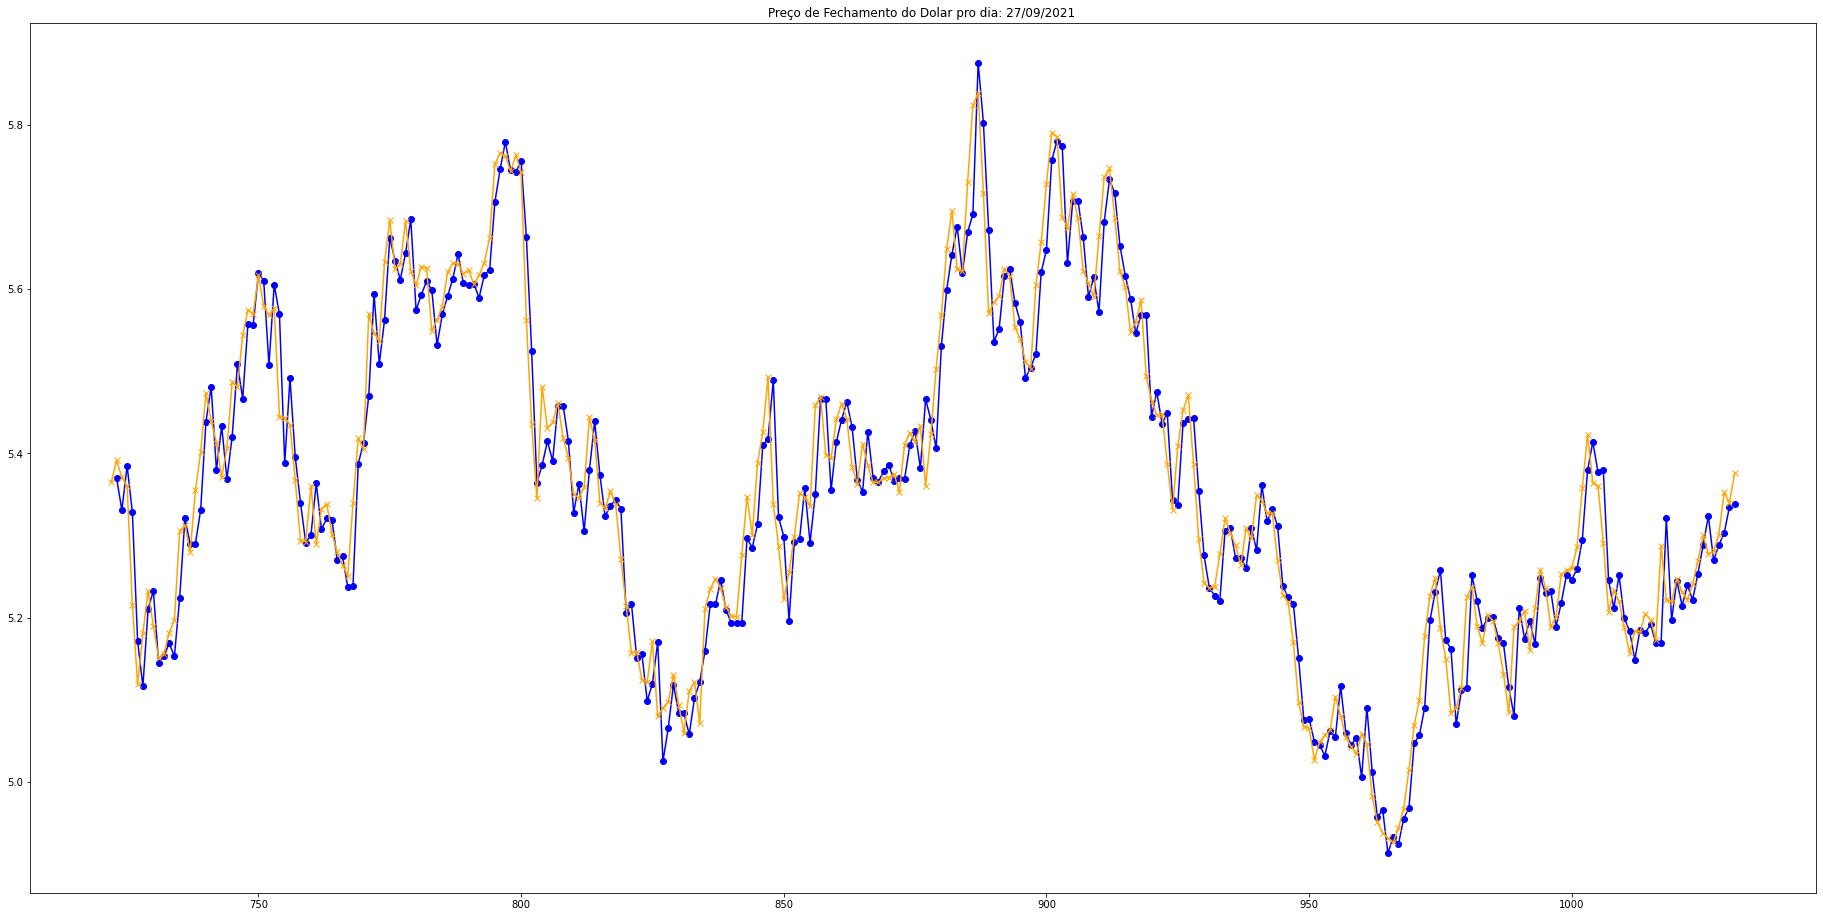

In [546]:
plt.figure(figsize=(32,16))
plt.title(f"Preço de Fechamento do Dolar pro dia: {datatual} ")
plt.plot(df0['Real'], label='Real', color = 'b', marker = 'o')
plt.plot(df0['Previsto'], label = 'Previsto', color = 'orange', marker = 'x')


In [547]:
#Executando a predição com RL

pred = lr.predict(X_test)

df0 = pd.DataFrame({'Real': y_test, "Previsto": pred})
df0['Real'] = df0['Real'].shift(+1)


In [548]:
df0

,Real,Previsto
722,NaN,5.368351
723,5.3698,5.383150
724,5.3311,5.368633
725,5.3849,5.349871
726,5.3283,5.207622
...,...,...
1027,5.2699,5.283304
1028,5.2888,5.294334
1029,5.3030,5.346937
1030,5.3344,5.335534


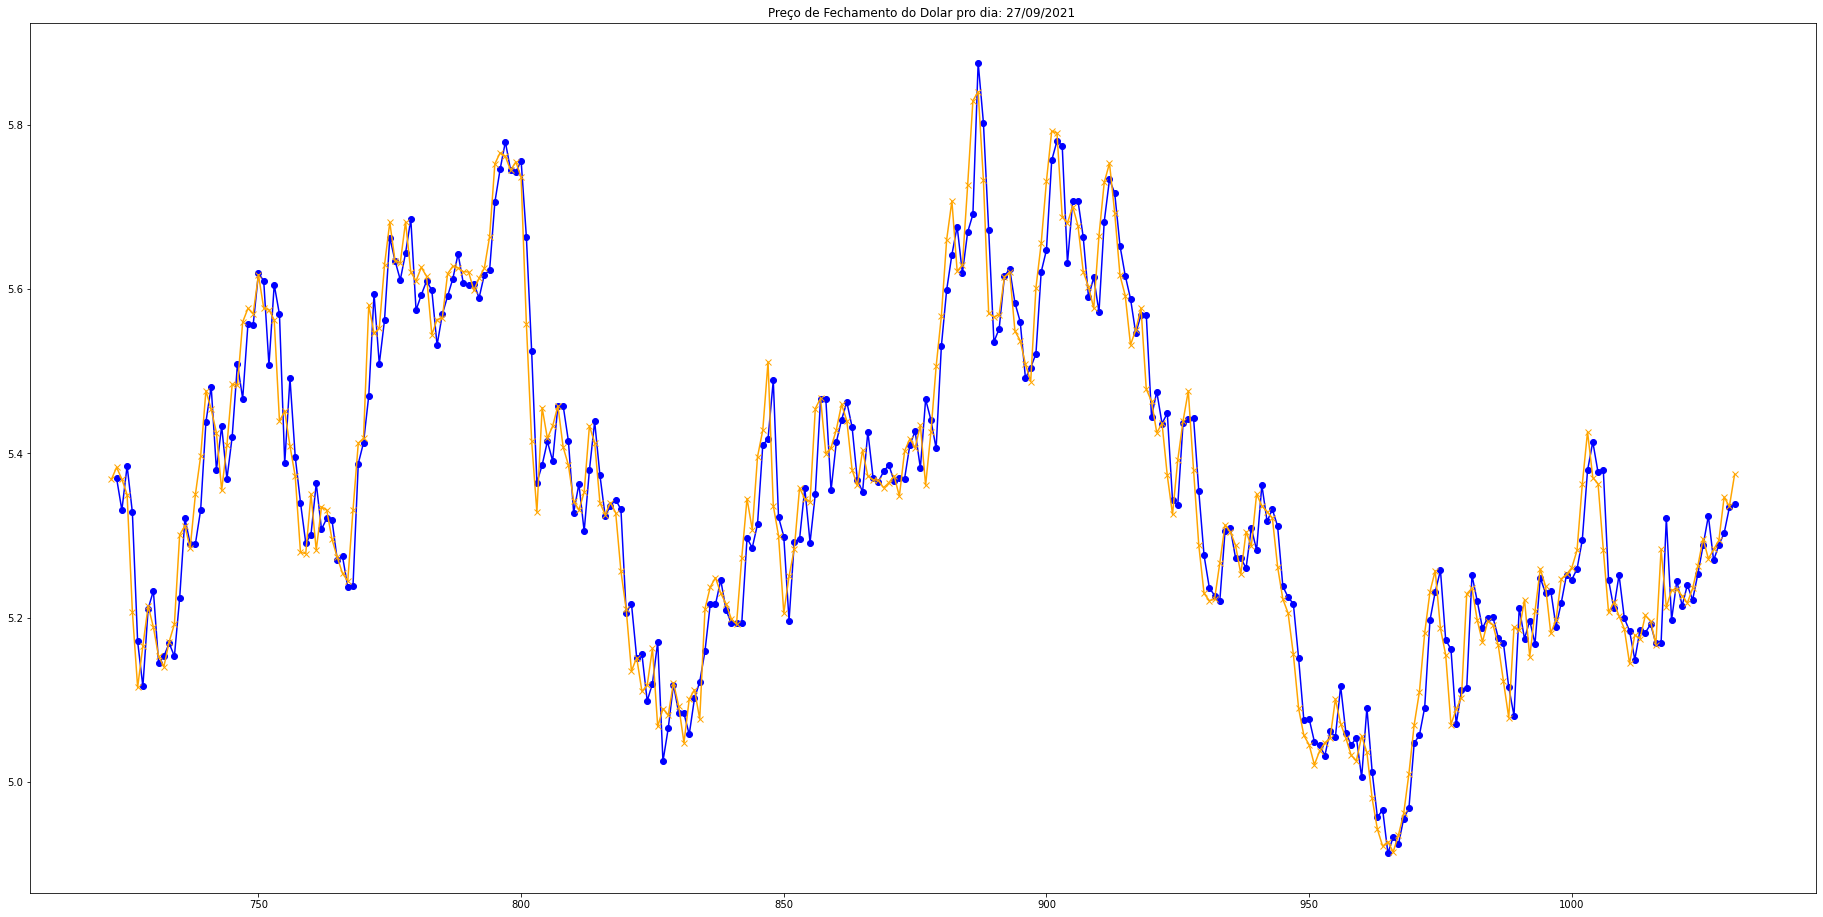

In [549]:
plt.figure(figsize=(32,16))
plt.title(f"Preço de Fechamento do Dolar pro dia: {datatual} ")
plt.plot(df0['Real'], label='Real', color = 'b', marker = 'o')
plt.plot(df0['Previsto'], label = 'Previsto', color = 'orange', marker = 'x')